## Content List

#### 1. Import libraries & data
#### 2. Hypothesis 
#### 3. Additional Visualizations
#### 4. Export libraries & data

## 1. Import libraries & data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

warnings.filterwarnings("ignore") # Disable warnings
plt.style.use('fivethirtyeight') # styling option for how plots will appear

In [2]:
# create path variable

path = r'/Users/jsok/US Education Analysis'

In [3]:
# read csv file 

df = pd.read_csv(os.path.join(path,'02 Data','states_all_new4.csv'), index_col=0)

In [4]:
df.head()

,State,Year,Total_Revenue,Total_Expenditure,Net,Grade_PK,Grades_All,Grade_12,Avg_Math_4_Score,Avg_Math_8_Score,Avg_Reading_4_Score,Avg_Reading_8_Score,us_region
0,Alabama,1992,2678885.0,2653798.0,25087,8224.0,731634.0,41167.0,208.0,252.0,207.0,NaN,South
1,Alaska,1992,1049591.0,972488.0,77103,2371.0,122487.0,6714.0,NaN,NaN,NaN,NaN,West
2,Arizona,1992,3258079.0,3401580.0,-143501,2544.0,673477.0,37410.0,215.0,265.0,209.0,NaN,West
3,Arkansas,1992,1711959.0,1743022.0,-31063,808.0,441490.0,27651.0,210.0,256.0,211.0,NaN,South
4,California,1992,26260025.0,27138832.0,-878807,59067.0,5254844.0,270675.0,208.0,261.0,202.0,NaN,West


In [5]:
# rename column names

df.rename(columns = {'Avg_Math_4_Score' : 'math4_score', 'Avg_Math_8_Score': 'math8_score', 'Avg_Reading_4_Score': 'reading4_score', 'Avg_Reading_8_Score': 'reading8_score'}, inplace = True)

In [6]:
df.columns

Index(['State', 'Year', 'Total_Revenue', 'Total_Expenditure', 'Net',
       'Grade_PK', 'Grades_All', 'Grade_12', 'math4_score', 'math8_score',
       'reading4_score', 'reading8_score', 'us_region'],
      dtype='object')

In [7]:
# Create subset of only numeric columns in 'educ'

df_num = df[['Total_Revenue', 'Total_Expenditure', 'Net',
       'Grade_PK', 'Grades_All', 'Grade_12', 'math4_score', 'math8_score',
       'reading4_score', 'reading8_score']]

In [8]:
# Ensure subset contains non-NaN data

df_num = df_num[df_num[['Total_Revenue']].notnull().all(1)
                    & df_num[['Total_Expenditure']].notnull().all(1)
                    & df_num[['Net']].notnull().all(1)
                    & df_num[['Grade_PK']].notnull().all(1)
                    & df_num[['Grades_All']].notnull().all(1)
                    & df_num[['Grade_12']].notnull().all(1)
                    & df_num[['math4_score']].notnull().all(1)
                    & df_num[['math8_score']].notnull().all(1)
                    & df_num[['reading4_score']].notnull().all(1)
                    & df_num[['reading8_score']].notnull().all(1)]

#### Elbow technique

In [9]:
# Define cluster range
# define k-means clusters in the range assigned

num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [10]:
# Creates a score that represents rate of variation for given clusters

score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] 

score

[-1.1582554780705197e+17,
 -3.9207914553317064e+16,
 -1.4187928406115466e+16,
 -8044269482233099.0,
 -5483818263287369.0,
 -3787990733797128.0,
 -2867698775061322.5,
 -1993151814882702.5,
 -1538638559538111.8]

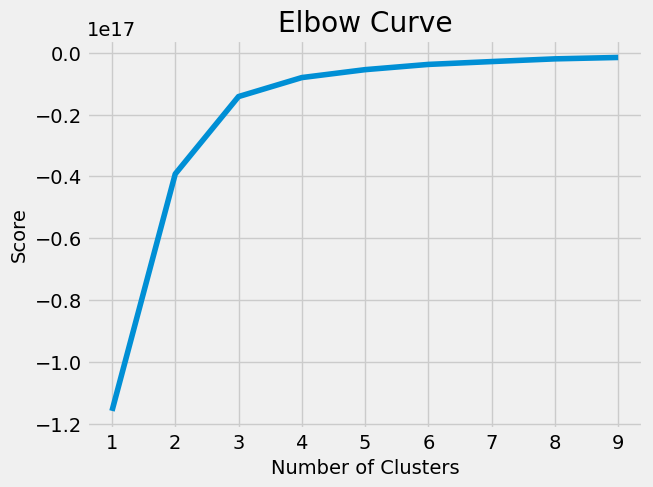

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### 3 clusters is optimal.

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

KMeans(n_clusters=3)

In [14]:
# create new column in 'educ_numeric' for clusters 

df_num['clusters'] = kmeans.fit_predict(df_num)

df_num['clusters'].value_counts()

0    267
1     64
2     15
Name: clusters, dtype: int64

In [15]:
df_num.columns

Index(['Total_Revenue', 'Total_Expenditure', 'Net', 'Grade_PK', 'Grades_All',
       'Grade_12', 'math4_score', 'math8_score', 'reading4_score',
       'reading8_score', 'clusters'],
      dtype='object')

## 2. Hypothesis:

#### - The better funding received in a State, the higher the Test Scores.

## 3. Additional Visualizations

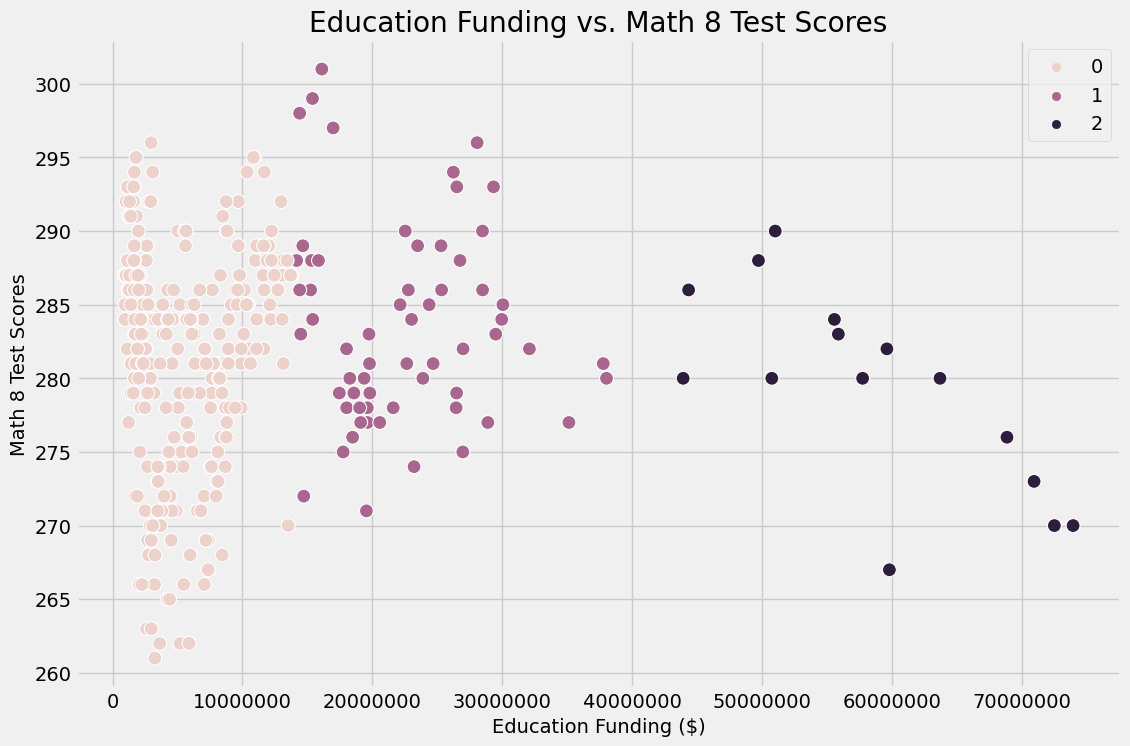

In [16]:
# Plot the clusters for the 'reading8_score' & 'math8_score'

plt.figure(figsize=(12,8))
scat1 = sns.scatterplot(x=df_num['Total_Revenue'], y=df_num['math8_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

scat1.grid(True) # This removes the grid from the background.
plt.title('Education Funding vs. Math 8 Test Scores') 
plt.xlabel('Education Funding ($)') # Label x-axis.
#plt.xticks(rotation=20)
plt.ticklabel_format(style='plain')
plt.ylabel('Math 8 Test Scores') # Label y-axis.
plt.show()

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

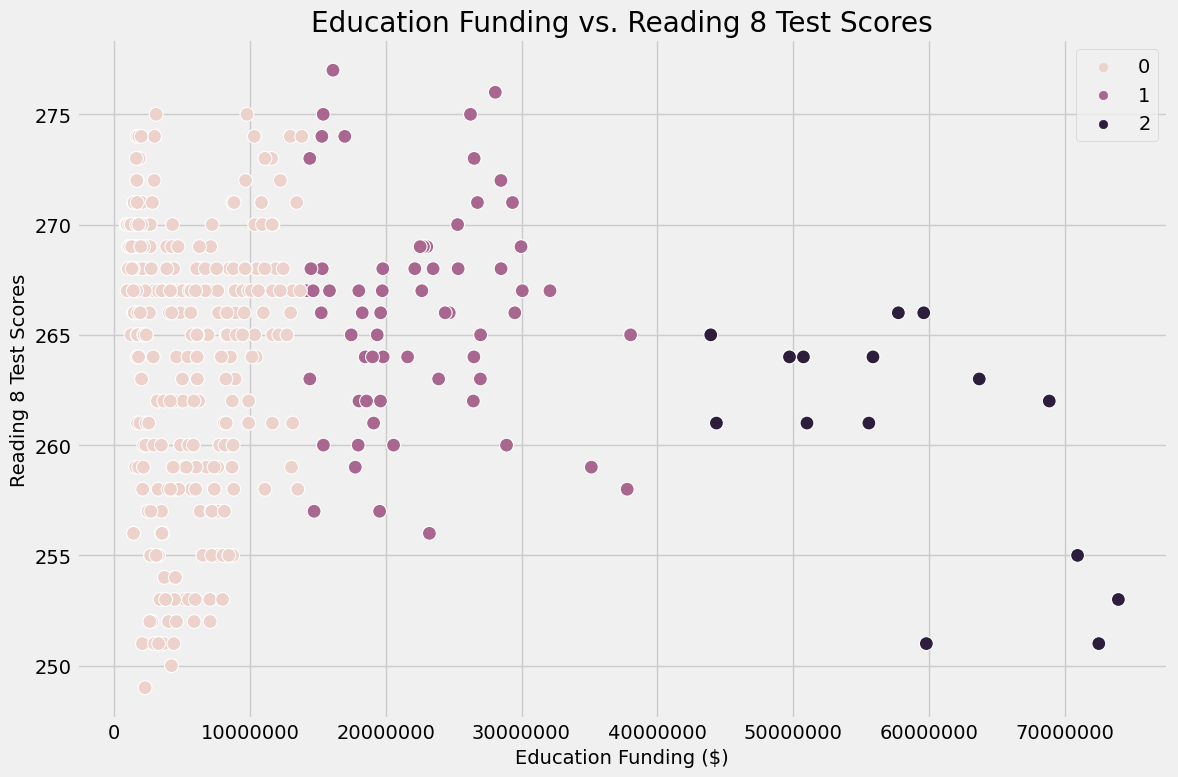

In [17]:
# Plot the clusters for the 'reading8_score' & 'math8_score'

plt.figure(figsize=(12,8))
scat2 = sns.scatterplot(x=df_num['Total_Revenue'], y=df_num['reading8_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

scat2.grid(True) # This removes the grid from the background.
plt.title('Education Funding vs. Reading 8 Test Scores') 
plt.xlabel('Education Funding ($)') # Label x-axis.
#plt.xticks(rotation=20)
plt.ticklabel_format(style='plain')
plt.ylabel('Reading 8 Test Scores') # Label y-axis.
plt.show()

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

## 4. Export data & visualizations

In [18]:
# export data

df.to_csv(os.path.join(path,'02 Data','states_all_new4.csv'))

In [19]:
# export visualizations

scat1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ed_funding_math8.png'))
scat2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ed_funding_reading8.png'))